### Import the necessary libraries for the project

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import src.limpieza_texto as lt
import src.visualizacion as vi

### Open the dataset

In [2]:
data = pd.read_csv("Data/data_cleaned.csv",encoding = "ISO-8859-1")

In [3]:
# Create a copy of the dataframe
df = data.copy()

In [4]:
# Check the number of rows and columns 
df.shape

(6302, 16)

## 1. Are sex and age factors that influence the possibility of an incident with a shark?

### 1st Hypothesis: Men have more susceptible of having an incident with a shark

### 2nd Hypothesis:  Boys and young men have more incidents with sharks

### 3rd Hypothesis: Young men have more fatal incidents with sharks

In order to get the necessary data to answer the question and check if the hypotheses are true, I will clean the 'Sex', 'Type' and 'Fatal (Y/N) Columns.

### Cleaning the sex columns

The column name Sex has a space after the name. 

I will change the name deleting the space.

In [5]:
df.rename(columns = {'Sex ':'Sex'}, inplace = True)

There are four additional categories besides the 'M' and 'F', that have to be replaced. 

As the amount of data to replace is small and we need to check it one by one to see if we can get the sex, I will do it manually. 

In [6]:
df['Sex'].value_counts()

M      5094
F       637
M         2
N         2
lli       1
.         1
Name: Sex, dtype: int64

I will check if the name is included in each of the rows, to know if I can categorize them or 

In [7]:
df.loc[df['Sex'] == 'N']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
4938,1934.07.11,11-Jul-1934,1934.0,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'","G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ..."
6131,1801.12.18.R,Reported 18-Dec-1801,1801.0,Provoked,NaN,NaN,NaN,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark,"The Evening Post, 12/18/1801"


In the row 6131 I can change the sex from 'N' to 'M', because we have the name.
First I will make sure that this is the only entry with that name. 

In [8]:
df.loc[df['Name'] == 'Stephen Pettigew']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
6131,1801.12.18.R,Reported 18-Dec-1801,1801.0,Provoked,NaN,NaN,NaN,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark,"The Evening Post, 12/18/1801"


Then I will correct it. 

In [9]:
df.loc[data['Name'].str.contains('Stephen Pettigew', case = False, na = False), 'Sex'] = 'M'

Now I will check the rest of the entries with the wrong category. 

In [10]:
df.loc[(df['Sex'] == 'N') | (df['Sex'] == 'lli') | (df['Sex'] == '.') | (df['Sex'] == 'M ')]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
563,2014.04.22,22-Apr-2014,2014.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Swimming,male,M,42,Laceration & puncture wounds to right foot,N,15h30,NaN,"R. Neale, Florida Today, 4/22/2014"
1587,2005.05.15,15-May-2005,2005.0,Unprovoked,AUSTRALIA,Queensland,50 km east of Townsville,Spearfishing,Ben Edelstein,M,NaN,Severe injury to lower leg,N,NaN,Blacktip shark,"J. Anderson, Townsville Bulletin, 5/21/2005"
1624,2004.11.11.b,11-Nov-2004,2004.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark,"R. Collier, GSAF"
4938,1934.07.11,11-Jul-1934,1934.0,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'","G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ..."
5437,1908.06.02.R,Reported 02-Jun-1908,1908.0,Sea Disaster,PAPUA NEW GUINEA,New Britain,Matupi,.,NaN,.,NaN,"Remains of 3 humans recovered from shark, but ...",Y,NaN,Allegedly a 33-foot shark,"Taranaki Herald, 6/2/1908"


In [11]:
df.iloc[563]

Case Number                                               2014.04.22
Date                                                     22-Apr-2014
Year                                                            2014
Type                                                      Unprovoked
Country                                                          USA
Area                                                         Florida
Location                                Cocoa Beach, Brevard  County
Activity                                                    Swimming
Name                                                            male
Sex                                                               M 
Age                                                               42
Injury                    Laceration & puncture wounds to right foot
Fatal (Y/N)                                                        N
Time                                                           15h30
Species                           

This one I found it because he is the only one registered with this injury

In [12]:
df.loc[df['Injury'] == 'Laceration & puncture wounds to right foot']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
563,2014.04.22,22-Apr-2014,2014.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Swimming,male,M,42,Laceration & puncture wounds to right foot,N,15h30,NaN,"R. Neale, Florida Today, 4/22/2014"


In [13]:
df.loc[data['Injury'].str.contains('Laceration & puncture wounds to right foot', case = False, na = False), 'Sex'] = 'M'

In [14]:
df.loc[df['Name'] == 'Ben Edelstein']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
1587,2005.05.15,15-May-2005,2005.0,Unprovoked,AUSTRALIA,Queensland,50 km east of Townsville,Spearfishing,Ben Edelstein,M,NaN,Severe injury to lower leg,N,NaN,Blacktip shark,"J. Anderson, Townsville Bulletin, 5/21/2005"


In [15]:
df.loc[df['Name'].str.contains('Ben Edelstein', case = False, na = False), 'Sex'] = 'M'

In [16]:
df.loc[df['Sex'].str.contains('lli', case = False, na = False), 'Sex'] = 'M'

After changing the entries that could be identified as male or female thanks to the info in the row, there are two cases in which it is not possible. 

I decided to put the one with the sex 'N' as male, because I assume it was a typo and the person pressed the 'N' in the keyboard by mistake. 

In [17]:
df['Sex'].replace(['N'], 'M', inplace = True)

But in the case there was a '.', I will save it as a Numpy NaN. 

In [18]:
df['Sex'].replace(['.'], np.nan, inplace = True)

In [19]:
df['Sex'].value_counts()

M    5099
F     637
Name: Sex, dtype: int64

### Cleaning the Type column

In [20]:
df['Type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

After checking the categories inside the Type column, the first thing I thought is that they are not mutually exclusive (at least as I understood them).

I consider that a provoked attack is an encounter initiated by a human, while an unprovoked one was an unexpected attack of a shark. 

With this definition, an attack could be only provoked or unprovoked. However, I would say that the cases in boat and boating could be any of both. 

Besides, I for my analysis consider it more interesting to know if an attack was provoked or unprovoked. 

Therefore, I will create a column with the name P/U, in which all the entries except Unprovoked and Provoked will be replaced with Invalid. 

In [21]:
df['P/U'] = df['Type']

df['P/U'].replace(['Sea Disaster', 'Boating', 'Boat', 'Questionable', 'Boatomg'], 'Invalid', inplace = True)

In [22]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,P/U
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",Invalid
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",Unprovoked
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",Invalid
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",Unprovoked
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,Provoked


Now there is a column with only Unprovoked, Provoked and Invalid cases. 

In [23]:
df['P/U'].value_counts()

Unprovoked    4595
Invalid       1129
Provoked       574
Name: P/U, dtype: int64

The column has 4 NaN rows. 

In [24]:
df['P/U'].isna().sum()

4

### Cleaning the Fatal (Y/N) column 

In [25]:
df['Fatal (Y/N)'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
y             1
2017          1
M             1
N             1
Name: Fatal (Y/N), dtype: int64

Here there were entries besides 'Y' and 'N'. In this case I created a function that replaces them with one or the two options, or if they go to UNKNOWN. 

In [26]:
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].apply(lt.clean_fatal)

This is the result after applying the function. 

In [27]:
df['Fatal (Y/N)'].value_counts()

N          4300
Y          1389
UNKNOWN     613
Name: Fatal (Y/N), dtype: int64

### Cleaning the Age colum 

In [28]:
df['Age'].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', 'Â\xa0 ', ' ', '30 or 36', '6Â½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',


First I will replace text with NaN values. 

In [29]:
NaN_values = [' nan', 'Teen', 'teen', 'Teens', 'Elderly', 'adult', '(adult)', '  ',
              '\xa0 ', '"middle-age"', 'MAKE LINE GREEN', '"young"', 'young', 'A.M.']

df['Age'].replace([NaN_values], np.nan, inplace = True)

For the cases in which the age is included in months, I decided to substitute them by 1 instead of 0. 

In [30]:
months = ['18', '9', '3']
df.loc[df['Age'].str.contains(('|'.join(months)), case = False, na = False), 'Age'] = '1'

In [31]:
df['Age'].unique()

array(['57', '11', '48', nan, '1', '52', '15', '12', '10', '21', '60',
       '54', '41', '56', '25', '55', '46', '45', '14', '40s', '28', '20',
       '24', '26', '22', '7', '17', '40', '42', '8', '50', '16', '82',
       '20s', '68', '51', '58', '47', '61', '65', '66', '60s', '72', '6',
       '27', '64', '71', '44', '62', '70', '50s', '77', '74', '28 & 26',
       '5', '86', '8 or 10', '84', 'Â\xa0 ', ' ', '6Â½', '21 & ?', '75',
       ' 28', '20?', "60's", '87', '67', 'mid-20s', '74 ', '45 ',
       '21 or 26', '20 ', '>50', '25 or 28', 'X', '81', '7 or 8', '78',
       '17 & 16', 'F', 'Both 11', '?    &   14', '10 or 12', '2Â½'],
      dtype=object)

In order to get the ages for the analysis, I will use this function that takes the first two digits from a string. 

I decided to use two, because the age range I want to analyze is higher than 10 years old. 

In [32]:
pattern = r'(\d{2})'


In [33]:
pattern = r'(\d{2})'

def get_age(pattern, x):
    try:
        age = re.findall(pattern, x)
        return age[0]
    except:
        pass

Here I was supposed to store the function in another file and call it, but I was not able to make it work. 

In [34]:
#df['Age of victim'] = df['Age'].dropna().apply(lt.get_age(pattern, num))

In [35]:
df['Age of victim'] = df['Age'].dropna().apply(lambda x: get_age(pattern, x))

In [ ]:
#df_3.explode('Age')

# Explode transforms each element of a list-like to a row, replicating index values. 

## 2 - Which are the activities with more attacks?

### 1st Hypothesis: Surfing is the activity with most non-fatal shark attacks

### 2nd Hypothesis: Spearfishing is the activity with the highest amount of fatal attacks

### Cleaning the activity column

Besides the columns cleaned before, in order to analyze the second question and the hypotheses I need to clean the activity column. 

In [36]:
df['Activity'].value_counts()

Surfing                                                                      971
Swimming                                                                     869
Fishing                                                                      431
Spearfishing                                                                 333
Bathing                                                                      162
                                                                            ... 
The USS Wahoo torpedoes & sank the Japanese troop transport Buyo Maru          1
Watching seine netters with friends, one of whom picked up a netted shark      1
Wading?                                                                        1
Helping men land a shark                                                       1
Explosion destroyed 28' boat, survivors in the water                           1
Name: Activity, Length: 1532, dtype: int64

In [37]:
df['Activity'].nunique()

1532

As in the case of the type column, I will create a separated one to narrow down the results. 

This way I can have a more filtered column, but keeping the other in case anything would need to be checked later on. 

In [38]:
df['Activity of victim'] = df['Activity']

In [39]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,P/U,Age of victim,Activity of victim
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",Invalid,57,Paddling
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",Unprovoked,11,Standing
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",Invalid,48,Surfing
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",Unprovoked,NaN,Surfing
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,Provoked,NaN,Free diving


Now I create a list with activities.

In [40]:
activities = list(df['Activity of victim'].unique())

In [41]:
activities

['Paddling',
 'Standing',
 'Surfing',
 'Free diving',
 'Kite surfing',
 'Swimming',
 'Fishing',
 'Walking',
 'Feeding sharks',
 'Boogie boarding',
 'Scuba diving',
 'Paddle-skiing',
 'Body boarding',
 'Windsurfing',
 'Stand-Up Paddleboarding',
 'Wading',
 'Scuba Diving',
 'Kayak fishing for sharks',
 'Cleaning fish',
 'Snorkeling',
 'Spearfishing',
 nan,
 'Diving',
 'Fishing / Wading',
 '2 boats capsized',
 'Night bathing',
 'Surfing ',
 'Kayaking / Fishing',
 'Kayaking',
 'Body surfing',
 'Swimming, poaching abalone',
 'Canoeing',
 'SUP',
 'Skimboarding',
 'Touching a shark',
 'Fishing ',
 'Attempting to lasso a shark',
 'Photo shoot',
 'Paddle boarding',
 'Kakaying',
 'Washing hands',
 'Grabbing shark for a selfie',
 'Kayak fishing',
 'Tagging sharks',
 'Surf skiing ',
 'Surf fishing',
 'Floating',
 'Cage Diving',
 'Surfng',
 'SUP Foil boarding',
 'Lobstering',
 'Fishing in Alabama Deep Fishing Rodeo',
 'Fishing for squid',
 'Fishing for sharks',
 'Floating in tube',
 'Teasing a shar

And then a pattern and a function to get the activities. This pattern selects the words ending with 'ing'. 

In [1]:
pattern = r'([a-zA-Z]*ing)'

In [2]:
def searching(pattern, string):
    try:
        act = re.search(pattern, string)
        return act.group().capitalize()
    except:
        return("not found")

I had the same problem with this function, I was not able to have it outside and call it. 

In [44]:
df['Activity of victim'] = df['Activity of victim'].dropna().apply(lambda x: searching(pattern, x))
#df['Activity of victim'] = df['Activity of victim'].dropna().apply(lt.searching(args = pattern))

In [45]:
df['Activity of victim'].unique() 

array(['Paddling', 'Standing', 'Surfing', 'Diving', 'Swimming', 'Fishing',
       'Walking', 'Feeding', 'Boarding', 'Skiing', 'Windsurfing',
       'Paddleboarding', 'Wading', 'Cleaning', 'Snorkeling',
       'Spearfishing', nan, 'not found', 'Bathing', 'Kayaking',
       'Canoeing', 'Skimboarding', 'Touching', 'Attempting', 'Kakaying',
       'Washing', 'Grabbing', 'Tagging', 'Floating', 'Lobstering',
       'Teasing', 'Photographing', 'Treading', 'Playing', 'Sitting',
       'Rowing', 'Bodysurfing', 'Filming', 'Petting', 'Kneeling',
       'Watching', 'Kitesurfing', 'Sailing', 'Kiteboarding', 'Casting',
       'Wrangling', 'Dragging', 'Bodyboarding', 'Crayfishing', 'Jumping',
       'Wakeboarding', 'Rescuing', 'Measuring', 'Crawling', 'Crabbing',
       'Sinking', 'Removing', 'Reviving', 'Shrimping', 'Lifesaving',
       'Competing', 'Holding', 'Crouching', 'Scurfing', 'Chumming',
       'Boeing', 'Killing', 'Collecting', 'Hiking', 'Conducting', 'Lying',
       'Splashing', 'Cruising

In [46]:
df['Activity of victim'].value_counts()

Swimming        1100
Surfing         1085
Fishing          712
Diving           528
Spearfishing     407
                ... 
Checking           1
Inspecting         1
Examining          1
Harassing          1
Seeing             1
Name: Activity of victim, Length: 193, dtype: int64

Once I have the activities, I will create a dictionary. The key will be the activity, and the value its value_count. 

In [47]:
value_count = df['Activity of victim'].dropna().value_counts()
value_count.index = value_count.index.astype(str)

activities_dict = value_count.to_dict()
activities_dict.pop("not found")
activities_dict

{'Swimming': 1100,
 'Surfing': 1085,
 'Fishing': 712,
 'Diving': 528,
 'Spearfishing': 407,
 'Bathing': 188,
 'Wading': 167,
 'Boarding': 136,
 'Standing': 131,
 'Snorkeling': 94,
 'Floating': 48,
 'Kayaking': 42,
 'Treading': 39,
 'Skiing': 36,
 'Attempting': 32,
 'Walking': 26,
 'Playing': 25,
 'Sitting': 21,
 'Windsurfing': 21,
 'Rowing': 21,
 'Paddling': 17,
 'Sinking': 14,
 'Canoeing': 14,
 'Freediving': 14,
 'Sailing': 13,
 'Washing': 13,
 'Feeding': 12,
 'Collecting': 12,
 'Skindiving': 11,
 'Netting': 11,
 'During': 9,
 'Splashing': 9,
 'Boating': 8,
 'Clinging': 8,
 'Lying': 7,
 'Hunting': 7,
 'Removing': 7,
 'Ding': 6,
 'Filming': 6,
 'Tagging': 6,
 'Competing': 6,
 'Jumping': 6,
 'Paddleboarding': 6,
 'Watching': 6,
 'Crossing': 6,
 'Lifesaving': 5,
 'Pulling': 5,
 'Dangling': 5,
 'Cleaning': 5,
 'Paddleskiing': 5,
 'Being': 4,
 'Working': 4,
 'Spearing': 4,
 'Escaping': 4,
 'Riding': 4,
 'Crabbing': 4,
 'Returning': 4,
 'Clamming': 4,
 'Killing': 4,
 'Catching': 4,
 'Draggi

Then I will create a column called and store the values in it. 

In [48]:
df['Activity count'] = df['Activity of victim'].map(activities_dict)

In [49]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,P/U,Age of victim,Activity of victim,Activity count
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",Invalid,57,Paddling,17.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",Unprovoked,11,Standing,131.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",Invalid,48,Surfing,1085.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",Unprovoked,NaN,Surfing,1085.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,Provoked,NaN,Diving,528.0


## Exporting the dataframes to create the graphs

Here I will filter the columns and store export the results, in order to create the graphs in a separate notebook. 

I was not able to open all the visualizations in the separated notebook, probably because I forgot to add one or more 'inplace = True'. Unfortunately I do not have time to correct it now, so I will export the graphs from here.  

In [50]:
df_calculation = df.loc[(df['Activity count'] > 100) & (df['Fatal (Y/N)'] == 'Y')]

In [51]:
df_calculation.to_csv('./Data/df_calculation.csv')

In [52]:
df_calculation2 = df.loc[(df['Activity count'] > 100) & (df['Fatal (Y/N)'] == 'N')]

In [53]:
df_calculation2.to_csv('./Data/df_calculation2.csv')

In [54]:
df_prov_unprov = (df['Sex'] == 'N') & (df['Sex'] == 'Y')

In [55]:
df_prov_unprov.to_csv('./Data/df_prov_unprov.csv') 

In [57]:
df_a_s = df.loc[(df['Age of victim'] < '60') & (df['Sex'])]

In [58]:
df_a_s.to_csv('./Data/df_a_s.csv')  

In [60]:
df_a_s2 = df.loc[(df['Age of victim'] < '60') & (df['Fatal (Y/N)'] != 'UNKNOWN')]

In [61]:
df_a_s2.to_csv('./Data/df_a_s2.csv') 

In [63]:
# Df to save the Provoked and Unprovoked without the Invalid
df_p_u = df.loc[(df['P/U'] == 'Unprovoked') | (df['P/U'] == 'Provoked')]

In [64]:
df_p_u.to_csv('./Data/df_p_u.csv') 

I will have all the graphs here just in case

In [65]:
# Replace all the 'not found' entries with NaN values
df['Age of victim'].replace(['not found'], np.nan, inplace = True)

In [66]:
list_age_nan = list(df['Age of victim'].unique())
list_ages = [x for x in list_age_nan if pd.isna(x) == False]
list_int = [x for x in list_ages if x < '60']

list_int.sort()

In [67]:
df['Fatal (Y/N)'].value_counts()

N          4300
Y          1389
UNKNOWN     613
Name: Fatal (Y/N), dtype: int64

In [68]:
list_int

['10',
 '11',
 '12',
 '14',
 '15',
 '16',
 '17',
 '20',
 '21',
 '22',
 '24',
 '25',
 '26',
 '27',
 '28',
 '40',
 '41',
 '42',
 '44',
 '45',
 '46',
 '47',
 '48',
 '50',
 '51',
 '52',
 '54',
 '55',
 '56',
 '57',
 '58']

In [69]:
df['Age of victim'].value_counts()

17    155
20    151
15    139
16    138
21    121
22    117
25    109
24    106
14    102
26     83
28     82
27     78
12     73
40     59
10     59
11     38
42     38
41     38
50     36
52     35
45     33
47     30
44     29
48     28
46     27
55     23
51     20
60     18
54     17
57     16
58     15
61     13
56     10
62      8
68      7
70      6
65      5
64      4
66      4
71      3
77      3
75      2
78      2
74      2
82      1
84      1
67      1
86      1
72      1
87      1
81      1
Name: Age of victim, dtype: int64

In [70]:
df['Age of victim'].unique()

array(['57', '11', '48', nan, None, '52', '15', '12', '10', '21', '60',
       '54', '41', '56', '25', '55', '46', '45', '14', '40', '28', '20',
       '24', '26', '22', '17', '42', '50', '16', '82', '68', '51', '58',
       '47', '61', '65', '66', '72', '27', '64', '71', '44', '62', '70',
       '77', '74', '86', '84', '75', '87', '67', '81', '78'], dtype=object)

In [71]:
df_prov_unprov = (df['Sex'] == 'N') & (df['Sex'] == 'Y')

In [72]:
df_p_u

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,P/U,Age of victim,Activity of victim,Activity count
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",Unprovoked,11,Standing,131.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",Unprovoked,NaN,Surfing,1085.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,Provoked,NaN,Diving,528.0
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris Â,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",Unprovoked,NaN,Surfing,1085.0
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,1,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",Unprovoked,None,Swimming,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",Unprovoked,NaN,Diving,528.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",Unprovoked,NaN,Diving,528.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",Unprovoked,NaN,Swimming,1100.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ÂºN, 79ÂºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",Unprovoked,NaN,NaN,NaN


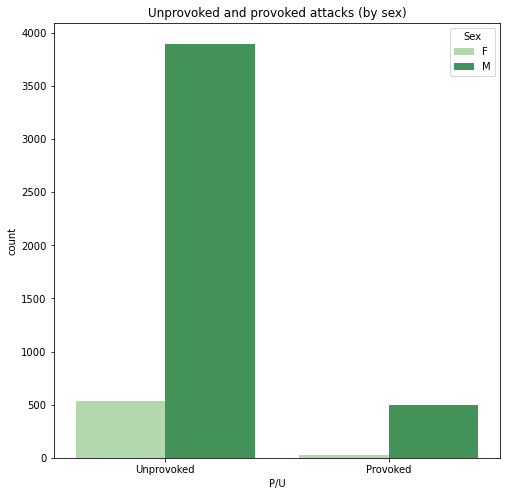

In [73]:
fig, ax = plt.subplots(figsize = (8, 8))
p_u_by_sex = sns.countplot(x = df_p_u['P/U'], hue = df_p_u['Sex'], palette="Greens")
ax.set_title("Unprovoked and provoked attacks (by sex)")
plt.show()

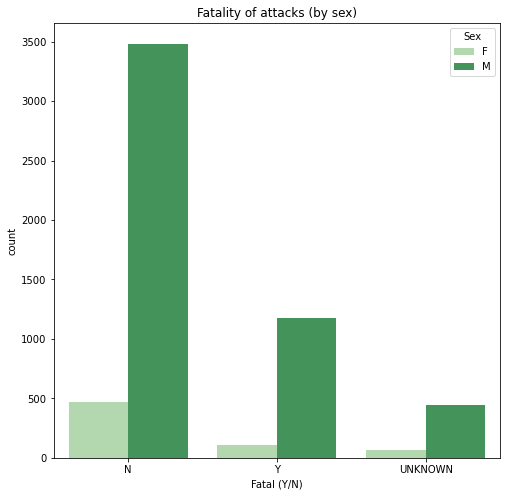

In [95]:
# This graph shows the provoked and unprovoked attacks by sex
fig, ax = plt.subplots(figsize = (8, 8))
fatality_of_attacks = sns.countplot(x = df['Fatal (Y/N)'], hue=df['Sex'], data = df_prov_unprov, palette="Greens")
ax.set_title("Fatality of attacks (by sex)")
plt.show()

In [96]:
vi.save_graph(fatality_of_attacks, "images/fatality_of_attacks.svg")

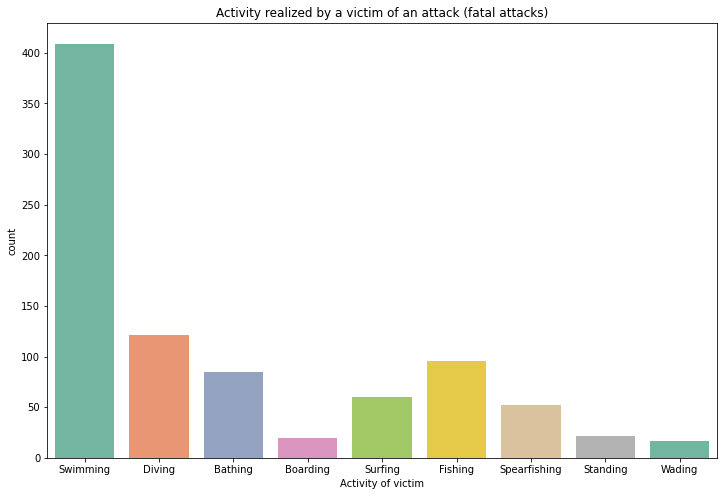

In [76]:
# This shows the amount of people that died as a result of an attack and the activity they were doing
# Try to make a graph combining both
fig, ax = plt.subplots(figsize = (12, 8))
activity_f = sns.countplot(x = 'Activity of victim', data = df_calculation, palette="Set2")
ax.set_title("Activity realized by a victim of an attack (fatal attacks)")
plt.show()

In [97]:
vi.save_graph(activity_f, "images/activity_f.svg")

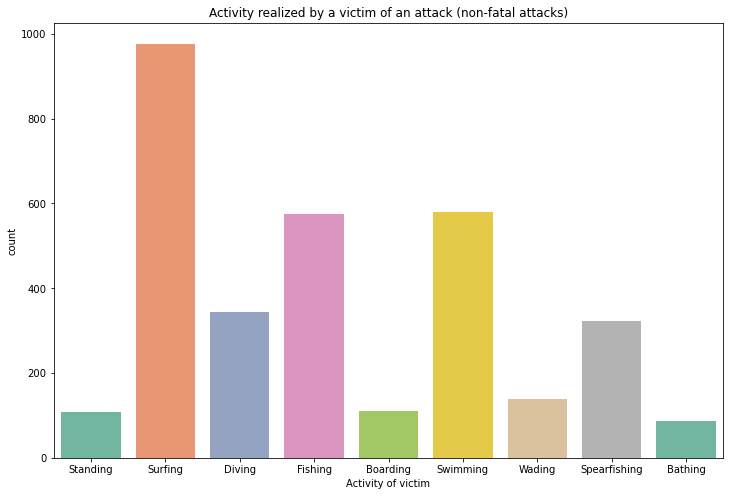

In [77]:
# This shows the amout of people attacked that survived, by activity
fig, ax = plt.subplots(figsize = (12, 8))
activity_non_f = sns.countplot(x = 'Activity of victim', data = df_calculation2, palette="Set2")
ax.set_title("Activity realized by a victim of an attack (non-fatal attacks)")
plt.show()

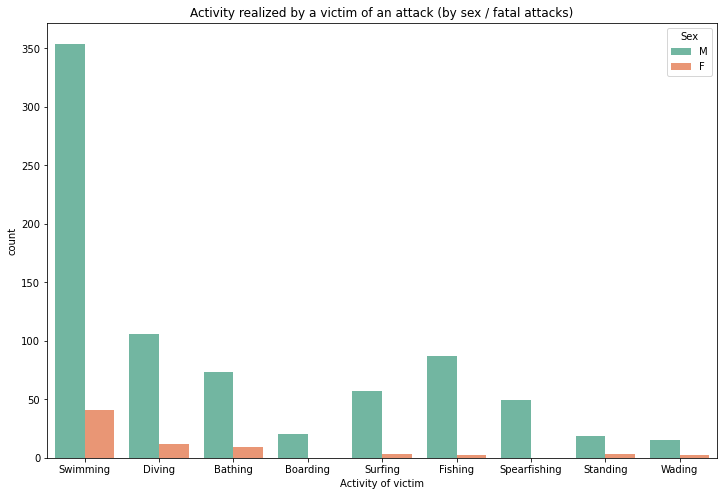

In [86]:
fig, ax = plt.subplots(figsize = (12, 8))
activity_f_by_sex = sns.countplot(x = 'Activity of victim', hue = 'Sex', data = df_calculation, palette="Set2")
ax.set_title("Activity realized by a victim of an attack (by sex / fatal attacks)")
plt.show()

In [89]:
vi.save_graph(activity_f_by_sex, "images/activity_f_by_sex.svg")

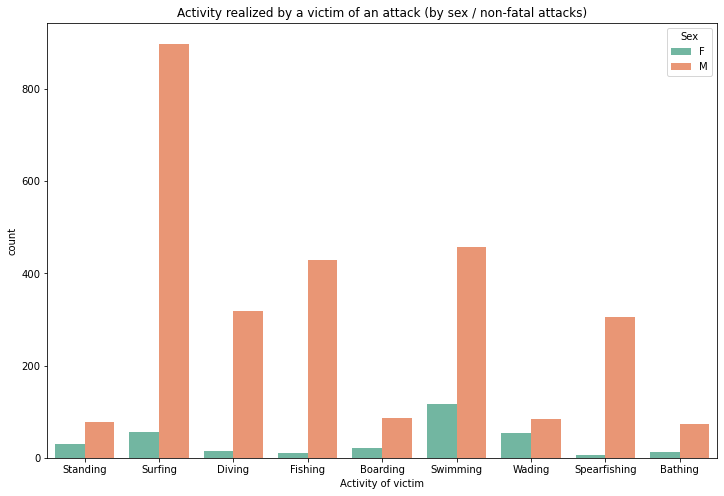

In [87]:
fig, ax = plt.subplots(figsize = (12, 8))
activity_non_f_by_sex = sns.countplot(x = 'Activity of victim', hue = 'Sex', data = df_calculation2, palette="Set2")
ax.set_title("Activity realized by a victim of an attack (by sex / non-fatal attacks)")
plt.show()

In [90]:
vi.save_graph(activity_non_f_by_sex, "images/activity_non_f_by_sex.svg")

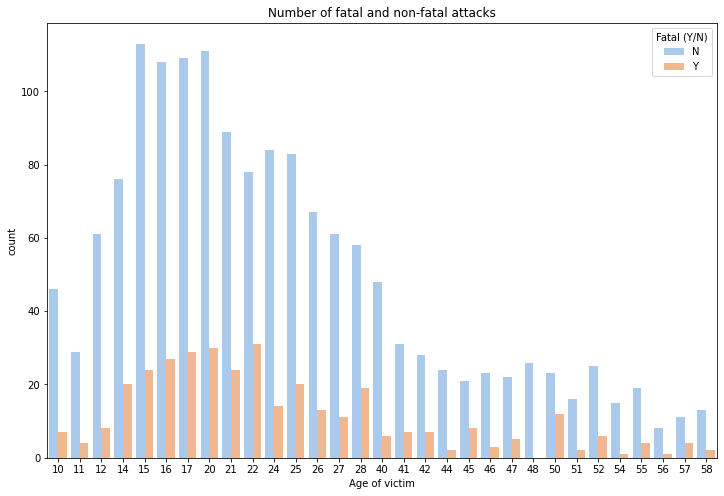

In [92]:
# This returns the amount of attacks by sex and age between 10 and 30
fig, ax = plt.subplots(figsize = (12, 8))
num_of_f_attacks = sns.countplot(x = 'Age of victim', hue = 'Fatal (Y/N)', data = df_a_s2, order = list_int, palette = "pastel")
ax.set_title("Number of fatal and non-fatal attacks")
plt.show()

In [93]:
vi.save_graph(num_of_f_attacks, "images/num_of_f_attacks.svg")

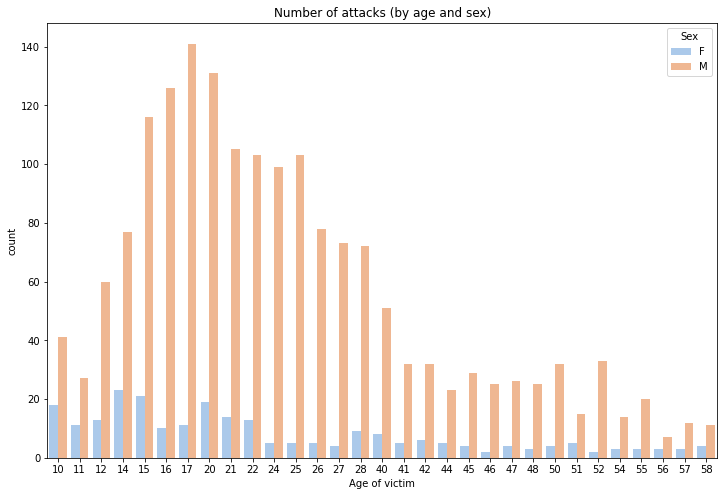

In [83]:
fig, ax = plt.subplots(figsize = (12, 8))
num_of_attacks = sns.countplot(x = 'Age of victim', hue = 'Sex', data = df_a_s, order = list_int, palette="pastel")
ax.set_title("Number of attacks (by age and sex)")
plt.show()

In [84]:
vi.save_graph(num_of_attacks, "images/num_of_attacks.svg")